In [35]:
import statsmodels.formula.api as smf


In [20]:
import numpy as np

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
#from patsy import dmatrices
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df = pd.read_csv("Data Set - Arrival Delay 45 Revised v1.csv")
#df = pd.read_csv("Data_Set_Flights.csv")
df.head()

,YEAR,MONTH,Month_Name,Day_WORD,Airline Name,Origin_City,Destination_City,DAY,DAY_OF_WEEK,DayType,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,January,Monday,American Airlines Inc.,Chicago,Dallas-Fort Worth,26,1,WD,...,1645,45,0,0,NaN,0,0,0,25,20
1,2015,1,January,Monday,American Airlines Inc.,Chicago,Tampa,12,1,WD,...,2222,45,0,0,NaN,10,0,0,32,3
2,2015,1,January,Monday,American Airlines Inc.,Chicago,West Palm Beach,12,1,WD,...,2340,45,0,0,NaN,3,0,0,42,0
3,2015,1,January,Monday,American Airlines Inc.,Detroit,Phoenix,12,1,WD,...,1422,46,0,0,NaN,20,0,26,0,0
4,2015,1,January,Monday,American Airlines Inc.,Chicago,Orlando,12,1,WD,...,1512,46,0,0,NaN,46,0,0,0,0


In [41]:
print(df['DEPARTURE_DELAY'].mean())

100.13971727753623


In [45]:

lm = smf.ols(formula='ARRIVAL_DELAY~DEPARTURE_DELAY+C(Airline_Type)+C(DayType)+C(ORIGIN_REGION_CODE)+C(DESTINATION_REGION_CODE)+ELAPSED_TIME', data=df).fit()
# print the coefficients
lm.params

Intercept                         -4.356244
C(Airline_Type)[T.1]               4.345964
C(DayType)[T.WE]                  -0.658246
C(ORIGIN_REGION_CODE)[T.2]         3.586339
C(ORIGIN_REGION_CODE)[T.3]         2.103952
C(ORIGIN_REGION_CODE)[T.4]         0.205305
C(DESTINATION_REGION_CODE)[T.2]    3.452032
C(DESTINATION_REGION_CODE)[T.3]    2.923555
C(DESTINATION_REGION_CODE)[T.4]   -2.596522
DEPARTURE_DELAY                    0.918659
ELAPSED_TIME                       0.087253
dtype: float64

In [25]:
lm = smf.ols(formula='ARRIVAL_DELAY~DEPARTURE_DELAY', data= df).fit()

In [46]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 5.341e+05
Date:                Fri, 13 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:50:29   Log-Likelihood:            -1.8997e+06
No. Observations:              424586   AIC:                         3.799e+06
Df Residuals:                  424575   BIC:                         3.799e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept 

In [14]:
#res.rsquared
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 4.804e+06
Date:                Fri, 13 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:04:36   Log-Likelihood:            -1.9204e+06
No. Observations:              424586   AIC:                         3.841e+06
Df Residuals:                  424584   BIC:                         3.841e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          12.6113      0.054    233.538      0.000        12.505    12.717
DEPARTURE_DELAY     0.9146      0.000   2191.831      0.000         0.914     0.915
==============================================================================
Omnibus:                   161547.101   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           762638.952
Skew:                           1.816   Prob(JB):                         0.00
Kurtosis:                       8.470   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:

max_val = max(df['DEPARTURE_DELAY'])
max_val
min_val = min(df['DEPARTURE_DELAY'])
min_val

-22

In [29]:
X_new = pd.DataFrame({'DEPARTURE_DELAY': [df.DEPARTURE_DELAY.min(),df.DEPARTURE_DELAY.max()]})
X_new.head()

,DEPARTURE_DELAY
0,-22
1,1988


In [30]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([  -7.50975549, 1830.82247568])

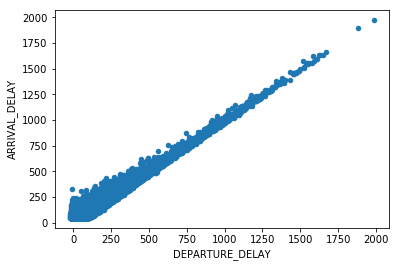

In [47]:
#first plot the observed data
df.plot(kind='scatter', x='DEPARTURE_DELAY', y='ARRIVAL_DELAY')
#flights_data[['DEPARTURE_DELAY']].corr()
#then, plot the least squares line
#plt.plot(X_new,preds, c='red',linewidth=2)

PLOTTING LEAST SQUARES LINE 


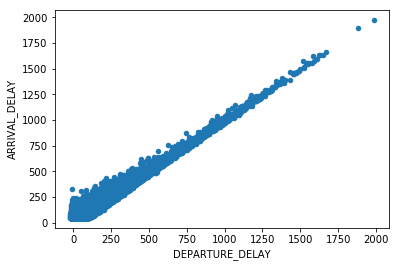

In [114]:
# first, plot the observed data
df.plot(kind='scatter', x='DEPARTURE_DELAY', y='ARRIVAL_DELAY')


# then, plot the least squares line
plt.plot(X_new1, preds, c='green',linewidth=2)
